# Power Laws: Detecting Anomalies in Usage
Energy consumption of buildings has steadily increased. There is an increasing realization that many buildings do not perform as intended by their designers. Typical buildings consume 20% more energy than necessary due to faulty construction, malfunctioning equipment, incorrectly configured control systems and inappropriate operating procedures.

The building systems may fail to meet the performance expectations due to various faults. Poorly maintained, degraded, and improperly controlled equipment wastes an estimated 15% to 30% of energy used in commercial buildings.

Therefore, it is of great potential to develop automatic, quick-responding, accurate and reliable fault detection and to provide diagnosis schemes to ensure the optimal operations of systems to save energy.

Schneider Electric already has relevant offers, but would like to determine if alternative techniques can add new detections / functionalities, bring gain in precision, or operate with less data.

In [1]:
import pandas as pd
import numpy as np
import power_utils

%matplotlib inline

In [4]:
train_loc = r'./tmp/train_prepared.csv'
test_loc = r'./input/submission_format.csv'
prediction_loc = r'./output/k_means_10_clusters.csv'
prediction_colname = 'predict'

In [5]:
train = pd.read_csv(train_loc)
predictions = pd.read_csv(prediction_loc)
test = pd.read_csv(test_loc)

train['predictions'] = predictions[prediction_colname]

train_clean = train.drop_duplicates(['timestamp', 'meter_id'])
combined = pd.merge(train_clean, test, how='left', left_on=['timestamp', 'meter_id'],
                    right_on=['Timestamp', 'meter_id'])

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
combined.head()

,meter_id,timestamp,values,site_id,meter_description,units,surface,activity,holiday,temperature,...,day,hour,minute,business_hours,evening,overnight,predictions,obs_id_y,Timestamp,is_abnormal
0,2,2015-06-11 00:00:00,2.035,334_61,main meter,kWh,2000.0,office,0.0,20.033333,...,11,0,0,0,1,0,5,NaN,NaN,NaN
1,2,2015-06-11 00:15:00,2.074,334_61,main meter,kWh,2000.0,office,0.0,NaN,...,11,0,15,0,1,0,5,NaN,NaN,NaN
2,2,2015-06-11 00:30:00,2.062,334_61,main meter,kWh,2000.0,office,0.0,NaN,...,11,0,30,0,1,0,5,NaN,NaN,NaN
3,2,2015-06-11 00:45:00,2.025,334_61,main meter,kWh,2000.0,office,0.0,NaN,...,11,0,45,0,1,0,5,NaN,NaN,NaN
4,2,2015-06-11 01:00:00,2.034,334_61,main meter,kWh,2000.0,office,0.0,NaN,...,11,1,0,0,1,0,5,NaN,NaN,NaN


In [9]:
combined.dtypes

meter_id                       object
timestamp                      object
values                        float64
site_id                        object
meter_description              object
units                          object
surface                       float64
activity                       object
holiday                       float64
temperature                   float64
distance                      float64
obs_id_x                        int64
values_business_day_lag_1     float64
values_day_lag_1              float64
values_day_lag_7              float64
values_business_day_diff_1    float64
values_day_diff_1             float64
values_day_diff_7             float64
dow                             int64
wom                             int64
year                            int64
month                           int64
day                             int64
hour                            int64
minute                          int64
business_hours                  int64
evening     

In [7]:
import seaborn as sns

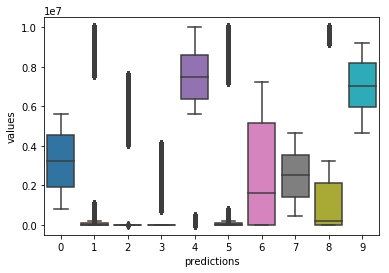

In [8]:
sns.boxplot(x="predictions", y="values", data=combined);

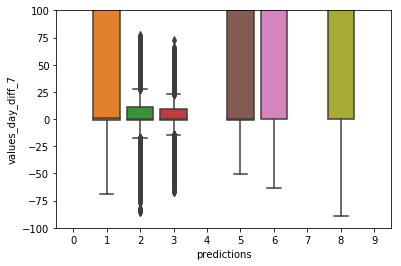

In [15]:
import matplotlib.pyplot as plt
sns.boxplot(x="predictions", y="values_day_diff_7", data=combined)
plt.ylim(-100, 100);

In [16]:
combined.to_csv('./tmp/clusters.csv')

In [17]:
test_final = combined.dropna(subset=['is_abnormal'])

In [24]:
test_final['is_abnormal'] = test_final.apply(lambda r: r['predictions'] == 0 or
                                             r['predictions'] == 7 or r['predictions'] == 9, axis=1)

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
test_final['is_abnormal'].value_counts()

False    320469
True      82166
Name: is_abnormal, dtype: int64

In [26]:
from datetime import datetime
test_scored = test_final[['obs_id_y', 'meter_id', 'Timestamp', 'is_abnormal']]
test_scored.columns = ['obs_id', 'meter_id', 'Timestamp', 'is_abnormal']
test_scored['obs_id'] = test_scored.loc[:, 'obs_id'].astype(int)
now = datetime.now()
output_note = 'kmeans_10'
test_scored.to_csv('./output/test_scored_{}_{}.csv'.format(now.strftime("%y%m%d%H%M%S"), output_note),
                   index=False)

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
